# Labolatorium 7 - Singular Value Decomposition

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

## Sfera i elipsoidy

Generowanie sfery jednostkowej z równania parametrycznego. Zmienna S przechowuje wszystkie wygenerowane punkty. Dzielę przedziały dziedziny tylko na 30 kawałków aby wykresy były czytelniejsze.

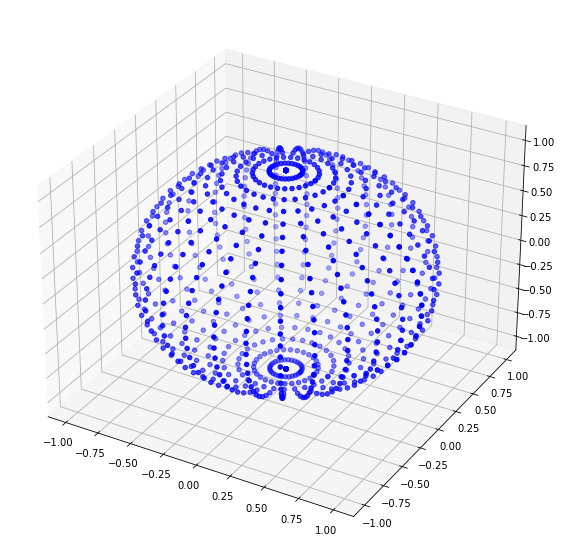

In [2]:
s = np.linspace(0, 2*np.pi, 30)
t = np.linspace(0, np.pi, 30)

X = np.outer(np.cos(s), np.sin(t))
Y = np.outer(np.sin(s), np.sin(t))
Z = np.outer(np.ones(np.size(s)), np.cos(t))
S = np.array([X, Y, Z])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#ax.plot_wireframe(X, Y, Z, color='b')
ax.scatter(X, Y, Z, color='b')
plt.show()

Generuję 3 losowe macierze 3x3 i domnażam je do punktów sfery, przez co otrzymuje elipsoidy (przekształcenie liniowe sfery). Korzystam z transpozycji przy wymnażaniu macierzy punktów z macierzą przekształcenia, aby policzone SVD miało odzwierciedlenie geometryczne. Udało się dojść do tego faktu doświadczalnie, po analizie wydaje mi się, że wynika to z faktu sposobu liczenia SVD przez NumPy. Dla każdej macierzy Ai wyznaczam jej faktoryzację SVD i wykorzystuje ją do policzenia wektorów półosi elipsy. Przekształcenie sfery jest geometryczną wizualizacją SVD. Największa wartość własna jest dla najdłuższej półosi elipsoidy, jest to oś wedle której sfera zmieniła się najbardziej. Wymnażając u i sigmę z SVD otrzymujemy wektory półosi, które są zaczepione w punkcie (0, 0, 0) (środek sfery i później elipsoid).

In [3]:
A1 = np.random.uniform (0, 5, size = (3, 3))
A2 = np.random.uniform (-10, 10, size = (3, 3))
A3 = np.random.uniform (0, 100, size = (3, 3))

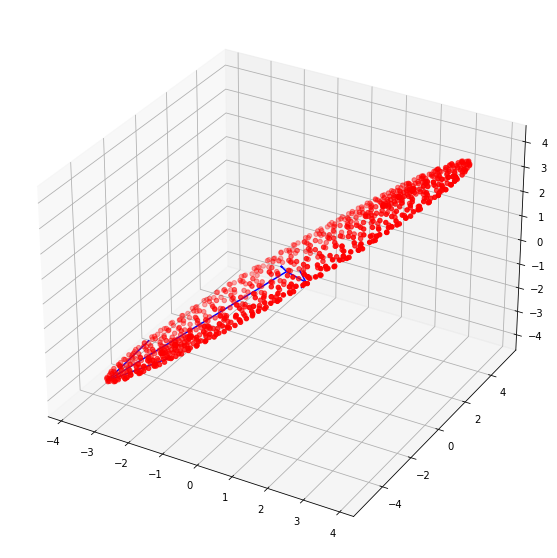

In [4]:
E1 = S.T @ A1.T
X1, Y1, Z1 = E1.T

u, s, vh = svd(A1)

semiaxis = u @ np.diag(s) 
tail = np.zeros (3)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.quiver (tail, tail, tail, *semiaxis, color='b')
ax.scatter(X1, Y1, Z1, color='r')
plt.show()

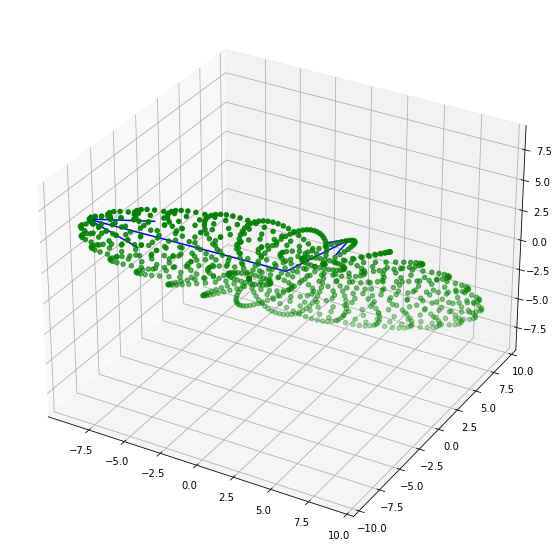

In [5]:
E2 = S.T @ A2.T
X2, Y2, Z2 = E2.T

u, s, vh = svd(A2)

semiaxis = u @ np.diag(s)
tail = np.zeros (3)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.quiver (tail, tail, tail, *semiaxis, color='b')
ax.scatter(X2, Y2, Z2, color='g')
plt.show()

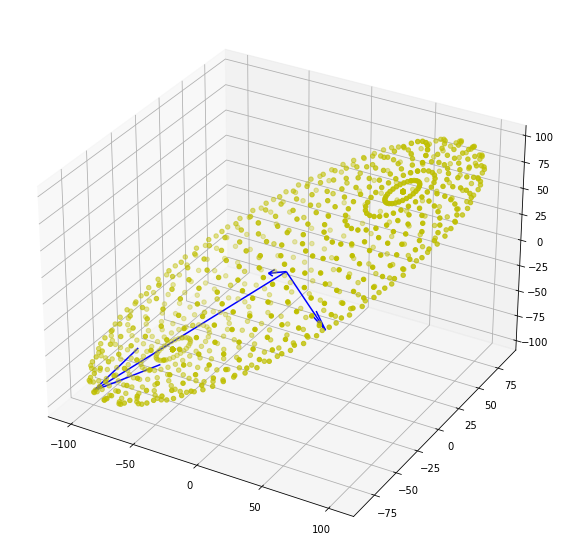

In [6]:
E3 = S.T @ A3.T
X3, Y3, Z3 = E3.T

u, s, vh = svd(A3)

semiaxis = u @ np.diag(s)
tail = np.zeros (3)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.quiver (tail, tail, tail, *semiaxis, color='b')
ax.scatter(X3, Y3, Z3, color='y')
plt.show()

Przykład macierzy dla której współczynnik obliczony poprzez podzielenie największej wartości własnej przez najmniejszą jest duży (rzędu 10^17). W takim wypadku elipsoida wydłuża się wzdłuż jednej z osi i kształtem przypomina 'cygaro'.

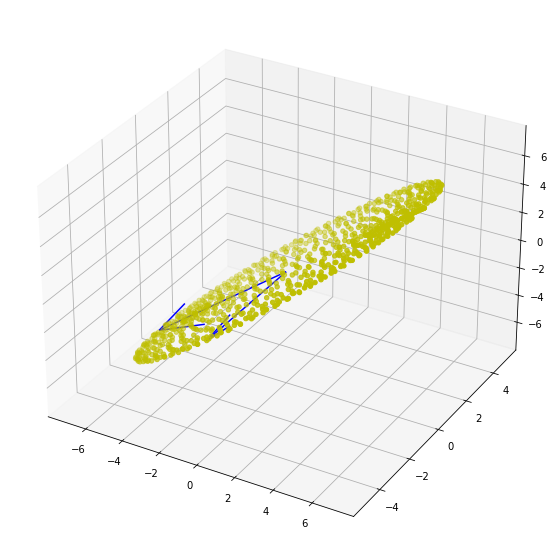

Iloraz wynosi 2.1767212649482544e+17


In [7]:
A4 = np.array ([[5, 0, 5], [0, 5, 0], [5, 0, 5]])

E4 = S.T @ A4.T
X4, Y4, Z4 = E4.T

u, s, vh = svd(A4)

semiaxis = u @ np.diag(s)
tail = np.zeros (3)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.quiver (tail, tail, tail, *semiaxis, color='b')
ax.scatter(X4, Y4, Z4, color='y')
plt.show()

print ("Iloraz wynosi", s[0]/s[-1])

Poniższa wizualizacja pokazuje jak domnażanie kolejnych macierzy przekształaca sferę. Kolejne etapy generują elipsoidy coraz bliższe wynikowi końcowemu. Po domnożeniu do S macierzy v możemy zaobserwować obrót sfery. Przemnożenie przez wartości własne skaluje sferę do elipsoidy. Macierz u obraca i ustawia sferę na końcowym położeniu. SVD policzone dla A transponowanego zgodnie z przykładami wyżej.

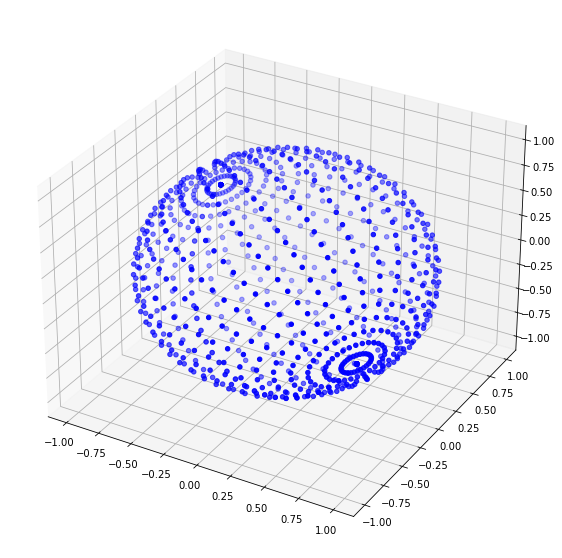

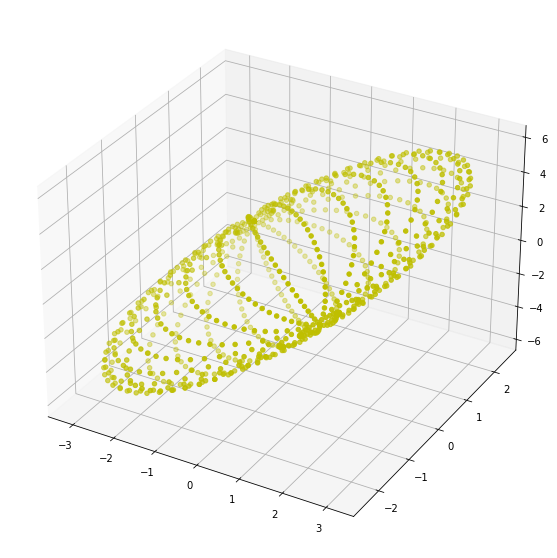

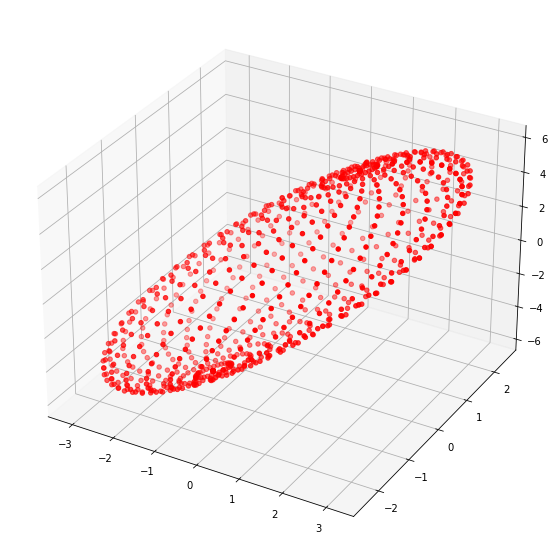

In [8]:
A5 = np.array ([[3, 0, 1], [1, 2, 1], [3, 0, 5]])

u, s, vh = svd(A5.T)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*((S.T@vh).T), color='b')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*((S.T@np.diag(s)@vh).T), color='y')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*((S.T@u@np.diag(s)@vh).T), color='r')

plt.show()

## Kompresja obrazu

Obraz został pobrany z internetu i wczytany z wykorzystaniem biblioteki PIL. Obraz został następnie zapisany do tablicy numpy.

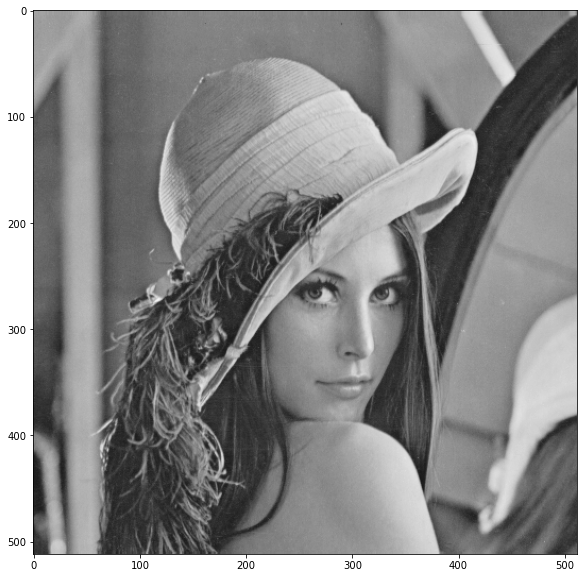

In [9]:
img = Image.open("lena.gif").convert("L")
lena = np.asarray(img)
plt.figure (figsize=(10, 10))
plt.imshow(lena, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Funkcja oblicza przybliżoną macierz I z wykorzystaniem k wektorów własnych.

In [10]:
def low_rank_approximation (u, s, vh, k):
    I = u[:,:k] @ np.diag(s[:k]) @ vh[:k]
    plt.figure (figsize=(7, 7))
    plt.imshow(I, cmap='gray', vmin = 0, vmax = 255)
    plt.show()
    return I

Test dla różnych k, widzimy, że na początku obraz jest nieczytelny. Wraz z zwiększaniem wartości k spada wartość normy różnicy macierzy co obserwujemy na wykresie. Dla k w pobliżu 60 obraz staje się czytelny i wyraźny. Przyjmując k = 60 musimy przechować 60 * 512 komórek tablicy U i tyle samo dla tablicy V oraz 60 wartości własnych co razem daje 61500 komórek. Dla obrazu przed kompresją potrzebujemy 512 * 512 komórek czyli 262144. A więc zmniejszyliśmy zajmowaną pamięć o ok. 77%.

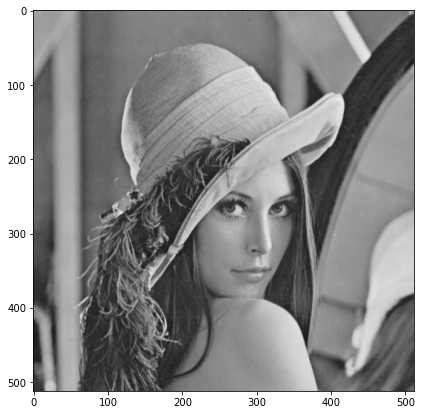

Przybliżenie 1 wartościami własnymi.


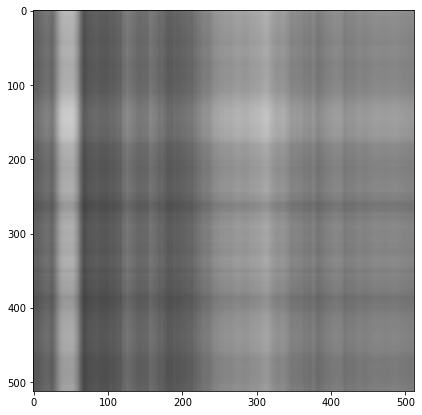

Przybliżenie 3 wartościami własnymi.


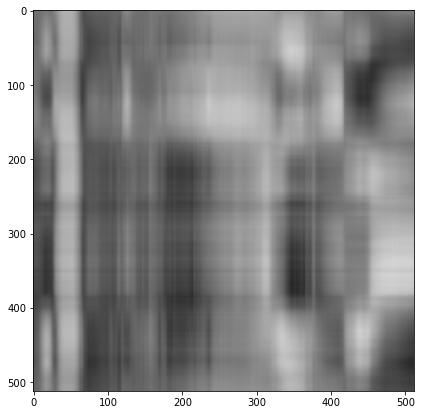

Przybliżenie 5 wartościami własnymi.


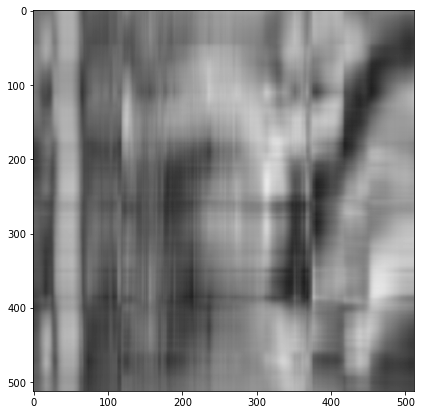

Przybliżenie 7 wartościami własnymi.


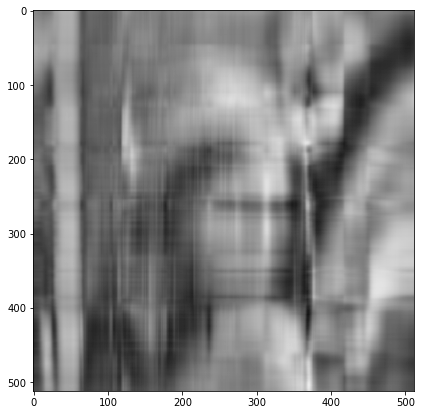

Przybliżenie 9 wartościami własnymi.


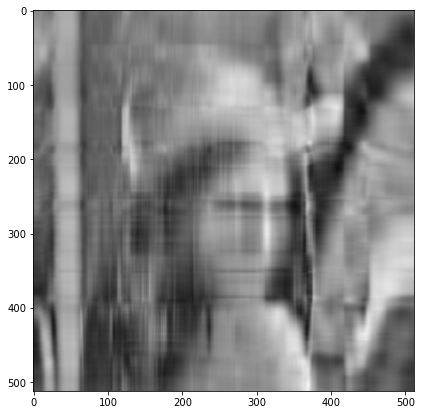

Przybliżenie 11 wartościami własnymi.


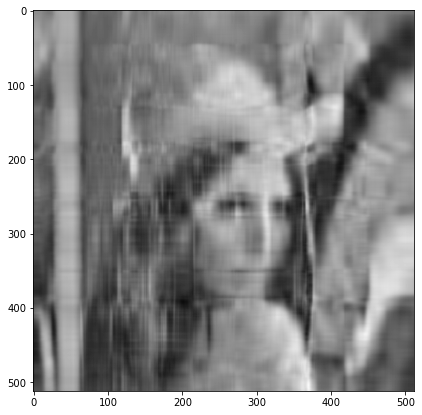

Przybliżenie 13 wartościami własnymi.


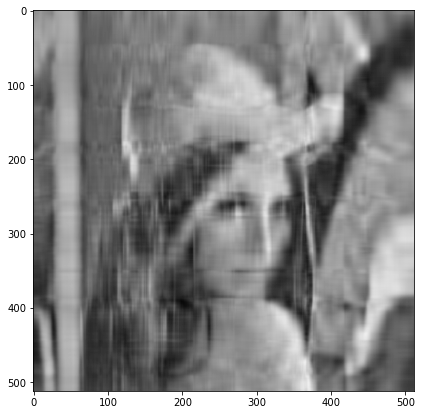

Przybliżenie 15 wartościami własnymi.


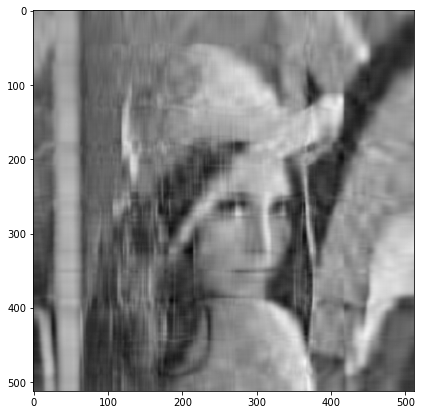

Przybliżenie 17 wartościami własnymi.


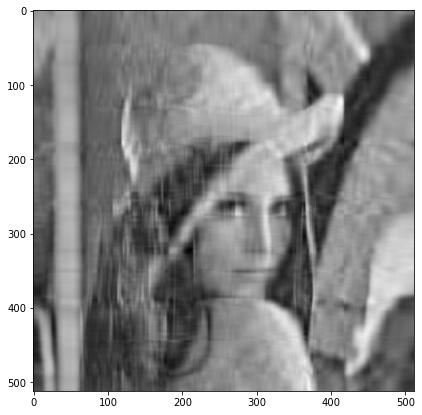

Przybliżenie 19 wartościami własnymi.


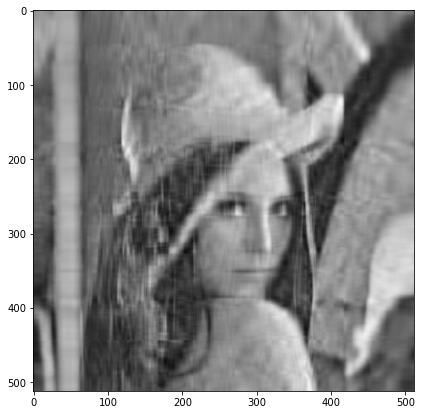

Przybliżenie 21 wartościami własnymi.


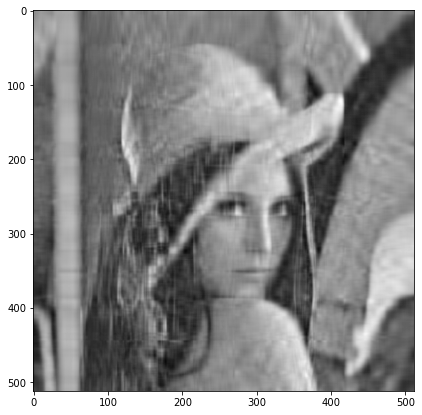

Przybliżenie 23 wartościami własnymi.


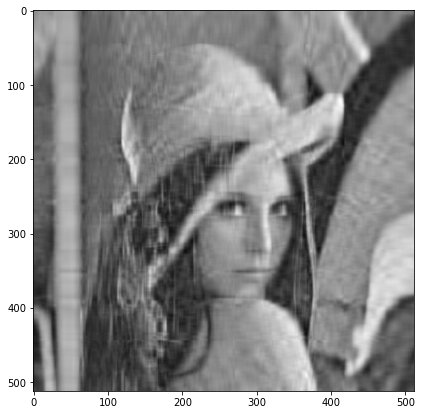

Przybliżenie 25 wartościami własnymi.


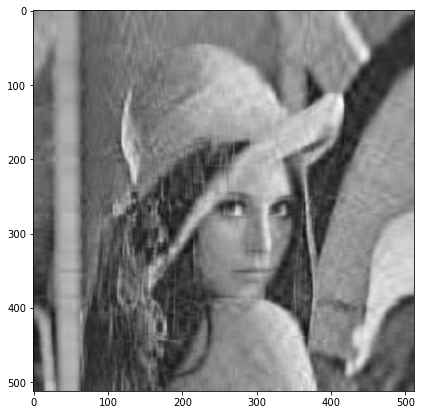

Przybliżenie 27 wartościami własnymi.


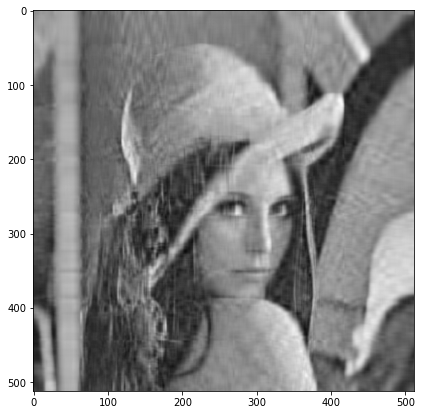

Przybliżenie 29 wartościami własnymi.


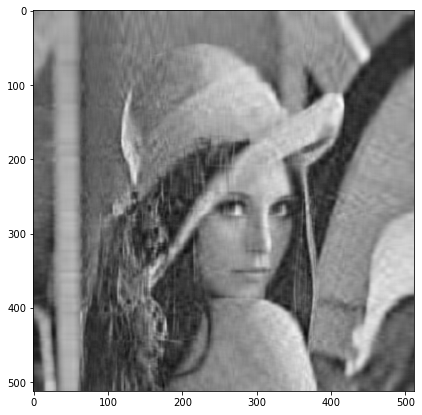

Przybliżenie 30 wartościami własnymi.


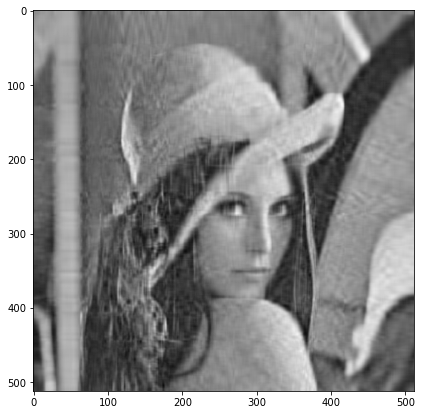

Przybliżenie 50 wartościami własnymi.


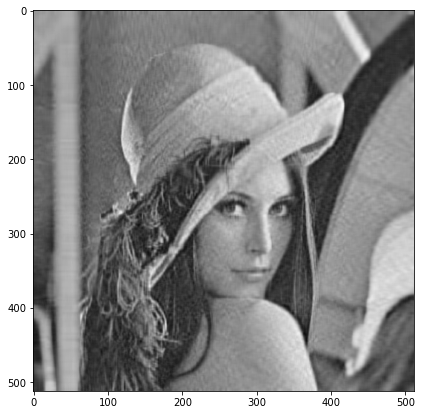

Przybliżenie 70 wartościami własnymi.


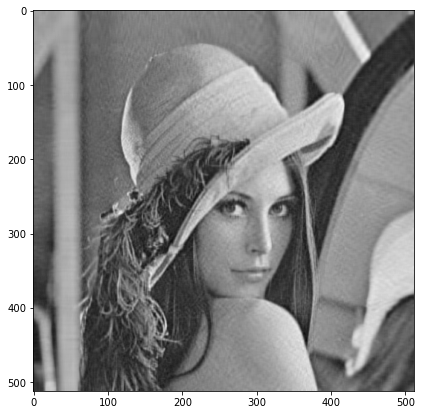

Przybliżenie 90 wartościami własnymi.


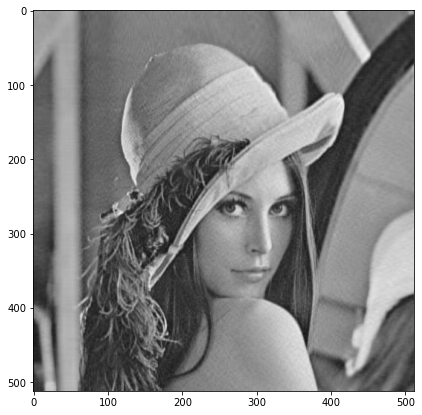

Przybliżenie 110 wartościami własnymi.


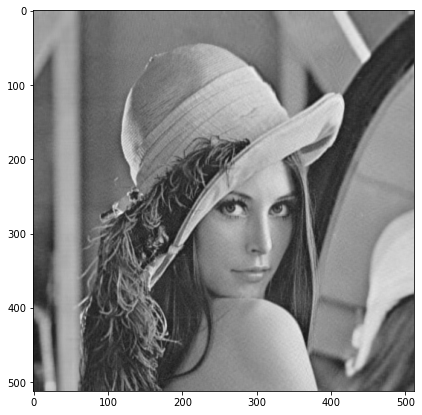

Przybliżenie 130 wartościami własnymi.


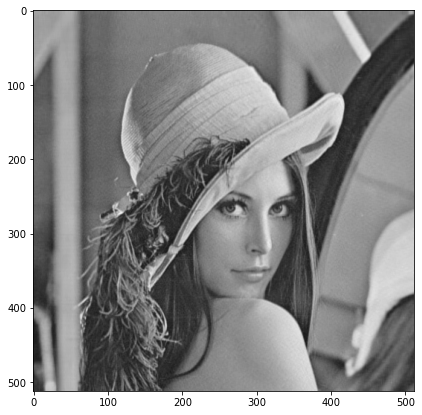

Przybliżenie 150 wartościami własnymi.


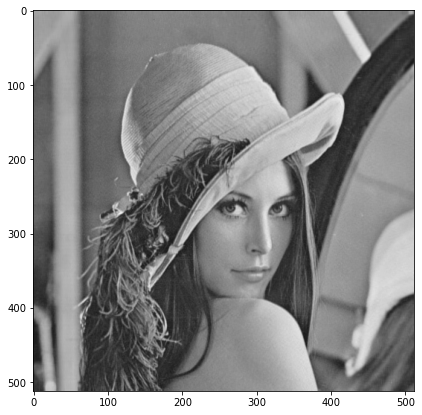

Przybliżenie 200 wartościami własnymi.


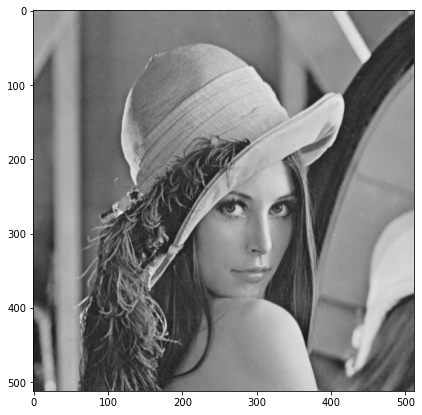

Przybliżenie 250 wartościami własnymi.


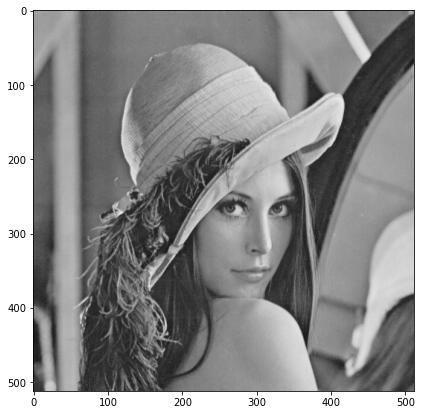

Przybliżenie 300 wartościami własnymi.


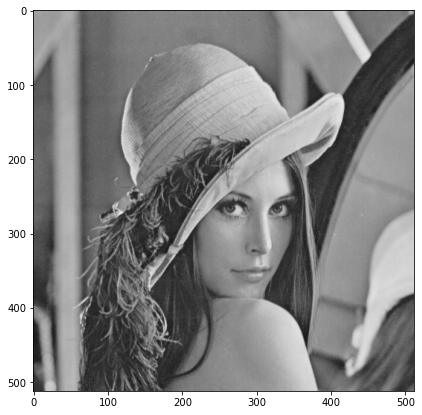

Przybliżenie 350 wartościami własnymi.


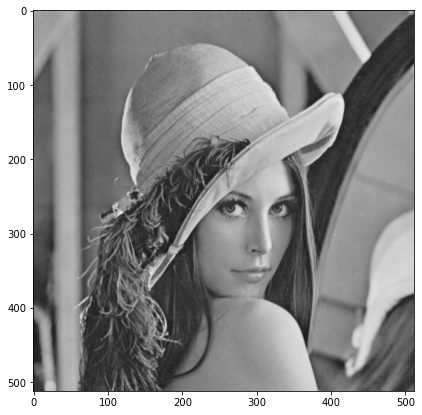

Przybliżenie 400 wartościami własnymi.


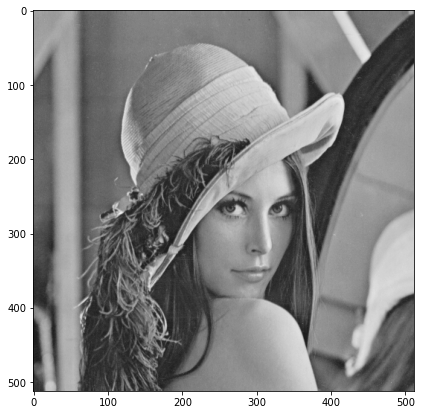

Przybliżenie 450 wartościami własnymi.


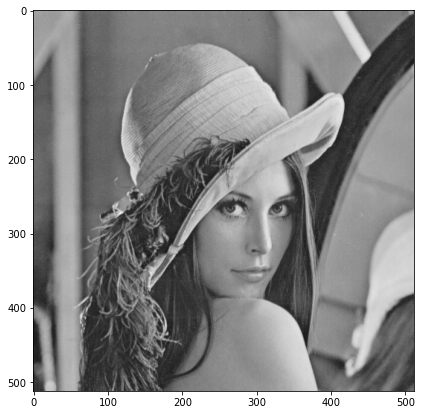

Przybliżenie 500 wartościami własnymi.


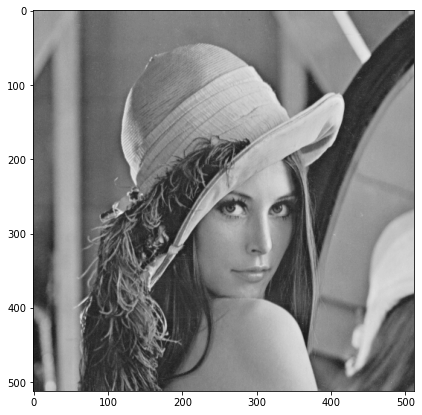

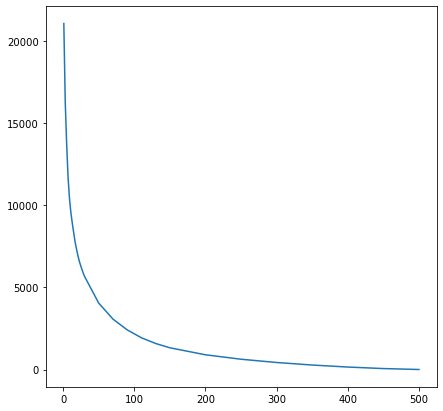

In [11]:
plt.figure (figsize=(7, 7))
plt.imshow(lena, cmap='gray', vmin = 0, vmax = 255)
plt.show()
u, s, vh = svd(lena)
X = []
Y = []
K = [i for i in range (1, 30, 2)]
K.extend ([i for i in range (30, 150, 20)])
K.extend ([i for i in range (150, 501, 50)])
for k in K:
    print ("Przybliżenie", k, "wartościami własnymi.")
    X.append(k)
    I = low_rank_approximation (u, s, vh, k)
    Y.append(np.linalg.norm (lena-I, ord = None))
plt.figure(figsize=(7, 7))
plt.plot (X, Y)
plt.show()